<a href="https://colab.research.google.com/github/chemaoxfz/bi23/blob/main/202201_Bi23_reaction_order_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
# Plotting modules and settings.
import matplotlib.pyplot as plt
import seaborn as sns
colors = ('#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
          '#bcbd22', '#17becf')
sns.set(style='ticks', palette=colors)

sns.set_context('talk',font_scale=2,rc={'lines.linewidth':3})

# The following is specific Jupyter notebooks
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}


## The function that computes the log derivative in general.
### You could specify \\(L\\) and \\(N\\) matrices directly, or use l_from_n function to compute \\(L\\) from \\(N\\).

In [ ]:
def log_der_calc(x,l_mat,n_mat):
  #given x, L and N, return the log derivative
  t_inv = 1/(l_mat.dot(x))
  temp=l_mat*x
  upper=(temp.T*t_inv).T
  logder_inv=np.concatenate((upper,n_mat),axis=0)
  return np.linalg.inv(logder_inv)

def l_from_n(n_mat):
  #given N matrix, return L matrix. 
  #Assume species ordered so that the atomic species come first.
  r=n_mat.shape[0]
  d=n_mat.shape[1]-r
  n1_mat=n_mat[:,:d]
  n2_mat=n_mat[:,-r:]
  l2_mat=-(n1_mat.T)*(np.linalg.inv(n2_mat).T)
  l_mat=np.concatenate((np.eye(d),l2_mat),axis=1)
  return l_mat


Sampling the reaction orders of \\(C\\) in \\(t_E\\) and \\(t_S\\) in the simple binding reaction \\(E+S \rightleftharpoons C\\).

Order of the species is \\((E,S,C)\\), order of the totals is \\((t_E,t_S)\\).

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

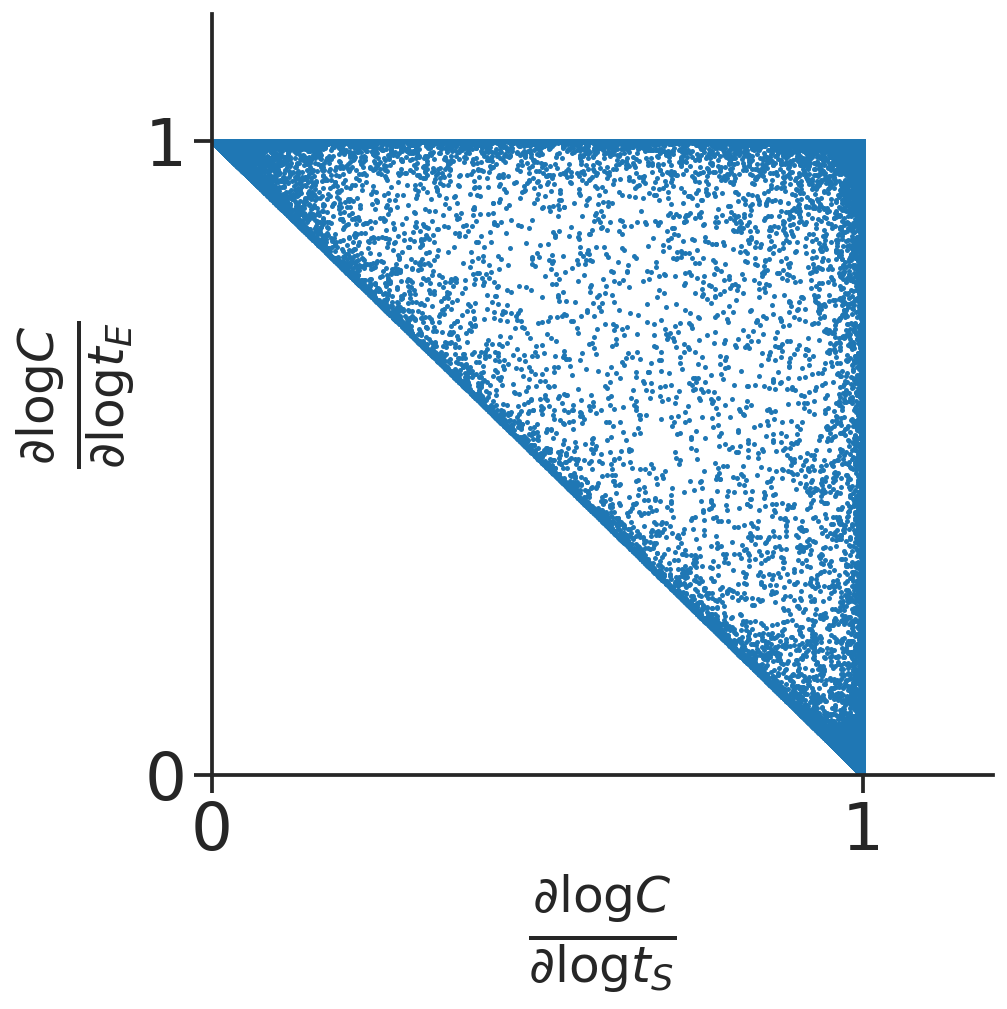

In [ ]:
l_mat=np.array([[1,0,1],
                [0,1,1]])
n_mat=np.array([[-1,-1,1]])
d_dim,n_dim=l_mat.shape

n_pts=100000
x_min_log10=-6
x_max_log10=6
xx=10**(np.random.rand(n_pts,n_dim)*(x_max_log10 - x_min_log10)+x_min_log10)
logders=np.zeros([n_pts,n_dim,n_dim]) # 2nd index is species, 3rd index is total and k.

for i in range(n_pts):
  logders[i]=log_der_calc(xx[i],l_mat,n_mat)

sns.set_context('talk',font_scale=2,rc={'lines.linewidth':3})

fig, ax = plt.subplots(1, 1,figsize=(7,7))
ax.scatter(logders[:,2,1],logders[:,2,0],s=1)
ax.set_xlabel(r'$\frac{\partial \log C}{\partial \log t_S}$')
ax.set_ylabel(r'$\frac{\partial \log C}{\partial \log t_E}$')

#remove top and right borders
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#restrict number of ticks
plt.locator_params(axis='x', nbins=2)
plt.locator_params(axis='y', nbins=2)

ax.set_xlim([0,1.2])
ax.set_ylim([0,1.2])
handles, labels = ax.get_legend_handles_labels()

## Below are commands that saves and then downloads the figure from google colab
plt.savefig('C-log-der-tE-tS-sampling.pdf', bbox_inches='tight')
from google.colab import files
files.download('C-log-der-tE-tS-sampling.pdf') 

Without re-simulating, we can take the points simulated from above and plot the reaction order of \\(E\\) in \\(t_E, t_S\\).

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

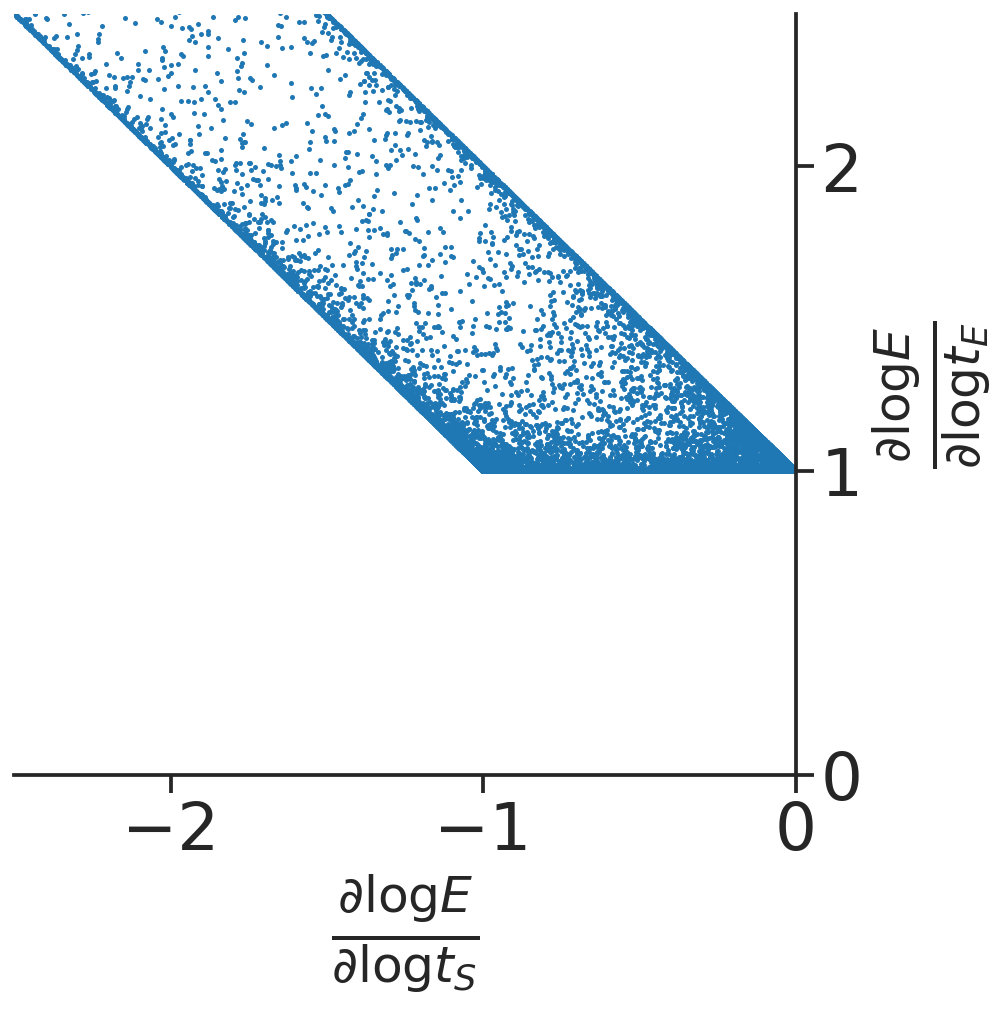

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(7,7))
ax.scatter(logders[:,0,1],logders[:,0,0],s=1)
ax.set_xlabel(r'$\frac{\partial \log E}{\partial \log t_S}$')
ax.set_ylabel(r'$\frac{\partial \log E}{\partial \log t_E}$')


#remove top and right borders
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.yaxis.set_ticks_position('right')
ax.yaxis.set_label_position('right') 
ax.set_xlim([-2.5,0])
ax.set_ylim([0,2.5])
plt.locator_params(axis='x', nbins=3)
plt.locator_params(axis='y', nbins=3)

handles, labels = ax.get_legend_handles_labels()
## Below are commands that saves and then downloads the figure from google colab
plt.savefig('E-log-der-tE-tS-sampling.pdf', bbox_inches='tight')
from google.colab import files
files.download('E-log-der-tE-tS-sampling.pdf') 

Here we investigate the various cases of binding to several substrates. 
(1) simple one step binding, \\(E_0+nS \rightleftharpoons E_n\\).
This case has \\(N = \begin{bmatrix} -1 & -n & 1 \end{bmatrix}\\), \\(L = \begin{bmatrix} 1 & 0 & 1 \\ 0 & 1 & n \end{bmatrix}\\).

In [ ]:
param_n=2

l_mat=np.array([[1,0,1],
                [0,1,param_n]])
n_mat=np.array([[-1,-param_n,1]])
d_dim,n_dim=l_mat.shape

n_pts=100000
x_min_log10=-6
x_max_log10=6
xx=10**(np.random.rand(n_pts,n_dim)*(x_max_log10 - x_min_log10)+x_min_log10)
logders=np.zeros([n_pts,n_dim,n_dim])
for i in range(n_pts):
  logders[i]=log_der_calc(xx[i],l_mat,n_mat)

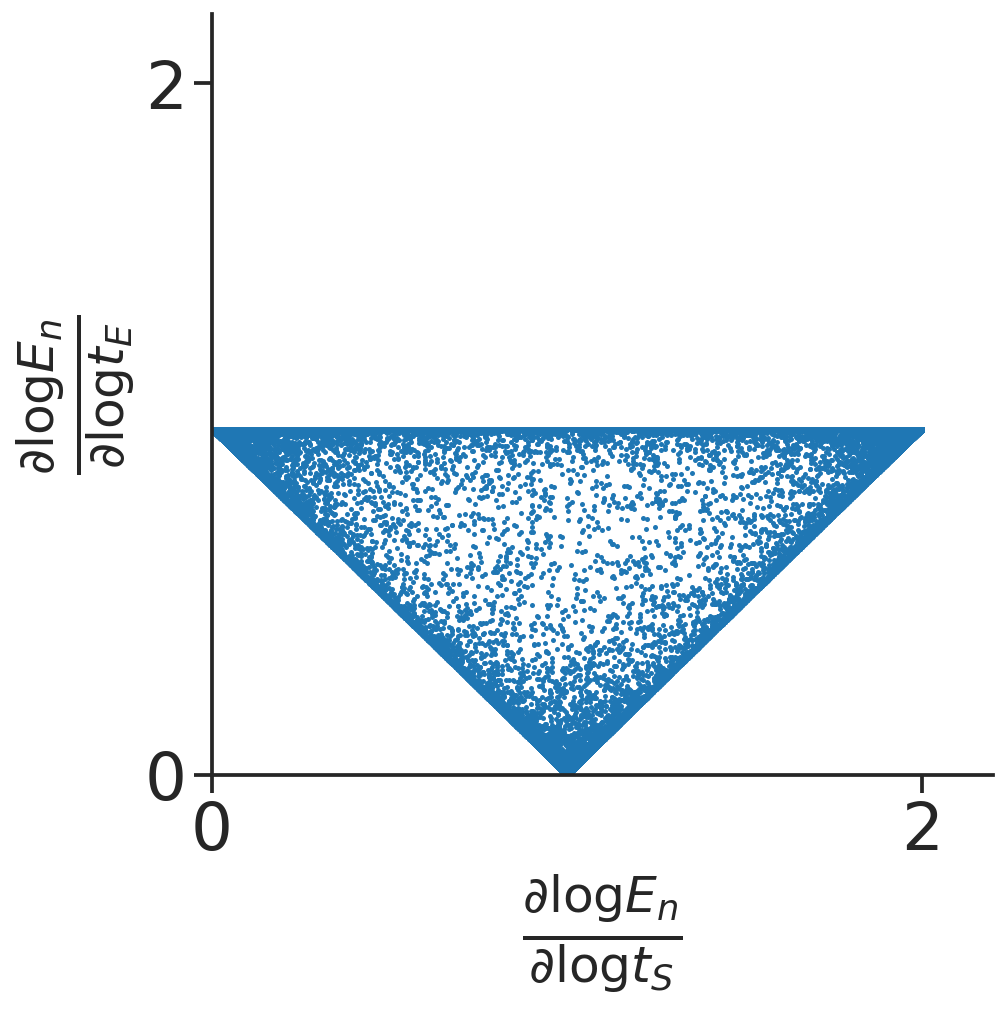

In [ ]:
sns.set_context('talk',font_scale=2,rc={'lines.linewidth':3})

fig, ax = plt.subplots(1, 1,figsize=(7,7))
ax.scatter(logders[:,2,1],logders[:,2,0],s=1)
ax.set_xlabel(r'$\frac{\partial \log E_n}{\partial \log t_S}$')
ax.set_ylabel(r'$\frac{\partial \log E_n}{\partial \log t_E}$')

#remove top and right borders
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#restrict number of ticks
plt.locator_params(axis='x', nbins=2)
plt.locator_params(axis='y', nbins=2)

ax.set_xlim([0,2.2])
ax.set_ylim([0,2.2])
handles, labels = ax.get_legend_handles_labels()
# plt.savefig('C-log-der-tE-tS-sampling.pdf', bbox_inches='tight')

Second case. (2) group binding, \\(nS \rightleftharpoons S_n\), \\(E_0+S_n \rightleftharpoons E_n\\).
Order species by \\((E_0,S,S_n,E_n)\\), order totals by \\((t_E,t_S)\\).
This case has \\(N = \begin{bmatrix} -1 & 0 & -1 & 1 \\ 0 & -n & 1 & 0 \end{bmatrix}\\), \\(L = \begin{bmatrix} 1 & 0 & 0 & 1 \\ 0 & 1 & n & n \end{bmatrix}\\).

In [ ]:
param_n=2

l_mat=np.array([[1,0,0,1],
                [0,1,param_n,param_n]])
n_mat=np.array([[-1,0,-1,1],
                [0,-param_n,1,0]])
d_dim,n_dim=l_mat.shape

n_pts=100000
x_min_log10=-6
x_max_log10=6
xx=10**(np.random.rand(n_pts,n_dim)*(x_max_log10 - x_min_log10)+x_min_log10)
logders=np.zeros([n_pts,n_dim,n_dim])
for i in range(n_pts):
  logders[i]=log_der_calc(xx[i],l_mat,n_mat)

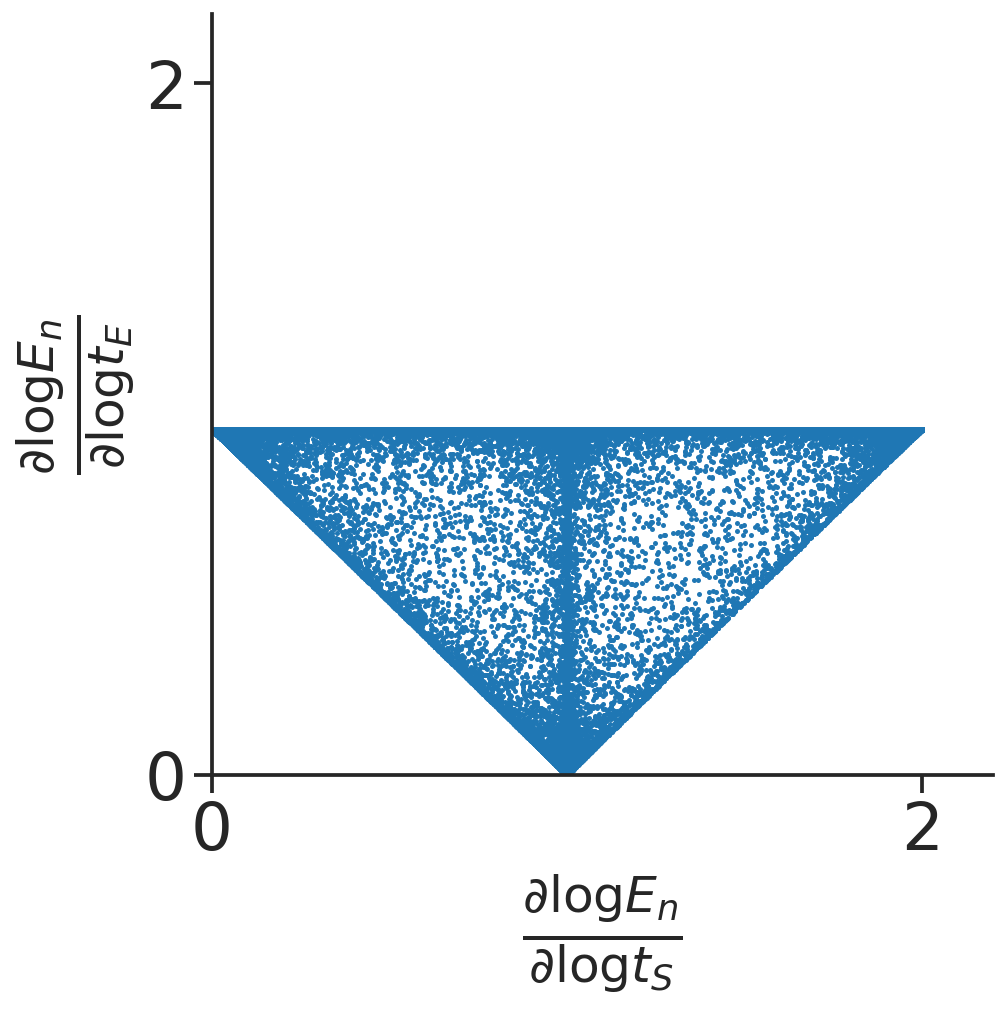

In [ ]:
sns.set_context('talk',font_scale=2,rc={'lines.linewidth':3})

fig, ax = plt.subplots(1, 1,figsize=(7,7))
ax.scatter(logders[:,3,1],logders[:,3,0],s=1)
ax.set_xlabel(r'$\frac{\partial \log E_n}{\partial \log t_S}$')
ax.set_ylabel(r'$\frac{\partial \log E_n}{\partial \log t_E}$')

#remove top and right borders
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#restrict number of ticks
plt.locator_params(axis='x', nbins=2)
plt.locator_params(axis='y', nbins=2)

ax.set_xlim([0,2.2])
ax.set_ylim([0,2.2])
handles, labels = ax.get_legend_handles_labels()
# plt.savefig('C-log-der-tE-tS-sampling.pdf', bbox_inches='tight')